<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-dataset-&amp;-librairies" data-toc-modified-id="Loading-dataset-&amp;-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading dataset &amp; librairies</a></span></li><li><span><a href="#Subgrouping" data-toc-modified-id="Subgrouping-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Subgrouping</a></span><ul class="toc-item"><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature selection</a></span></li><li><span><a href="#Z-scoring" data-toc-modified-id="Z-scoring-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Z-scoring</a></span></li></ul></li><li><span><a href="#Clustering-analyses" data-toc-modified-id="Clustering-analyses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering analyses</a></span><ul class="toc-item"><li><span><a href="#Multuplying-geneotypes-with-modes-before-correlating-with-risk-factors" data-toc-modified-id="Multuplying-geneotypes-with-modes-before-correlating-with-risk-factors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Multuplying geneotypes with modes before correlating with risk factors</a></span></li><li><span><a href="#Spearman's-correlations" data-toc-modified-id="Spearman's-correlations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Spearman's correlations</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Analyses" data-toc-modified-id="Analyses-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Analyses</a></span></li><li><span><a href="#Cross-correlation-plots-for-input-variable-wise-coefficients-of-genotype-specific-clustering" data-toc-modified-id="Cross-correlation-plots-for-input-variable-wise-coefficients-of-genotype-specific-clustering-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Cross-correlation plots for input-variable-wise coefficients of genotype-specific clustering</a></span></li></ul></li></ul></li></ul></div>

# Loading dataset & librairies

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from tqdm import tqdm
from scipy import stats
import os
import sys

In [2]:
data = pd.read_csv('HCDMNCOV_AD.csv')
data.head()

,eid,father,mother,sibling,mf,mfs,Fluid intelligence score (R),Loneliness,Lack of social support,Age,...,25741-2.0,25742-2.0,25006-2.0,21001-0.0,25756-2.0,25757-2.0,25758-2.0,25759-2.0,54-2.0,eid.1
0,1000124,0.0,0.0,0.0,0.0,0.0,6.71,0.0,1.0,44.0,...,0.138021,0.166914,663615.0,24.0980,-2.460460,62.0,17.01160,-1097.0,11025.0,1000124
1,1000181,0.0,0.0,0.0,0.0,0.0,6.71,0.0,1.0,57.0,...,0.140451,0.144204,609556.0,25.2792,-1.966260,59.0,-29.19310,-1042.0,11025.0,1000181
2,1000231,0.0,0.0,0.0,0.0,0.0,6.71,1.0,0.0,43.0,...,0.127892,NaN,611251.0,25.3462,1.900050,74.0,-24.32430,-1042.0,11027.0,1000231
3,1000247,0.0,0.0,0.0,0.0,0.0,8.00,0.0,0.0,61.0,...,0.246526,NaN,591077.0,31.1147,-0.266935,65.0,4.42269,-1085.0,11025.0,1000247
4,1000250,0.0,0.0,0.0,0.0,0.0,6.71,0.0,0.0,63.0,...,0.084830,NaN,546671.0,22.8772,-0.599555,61.0,34.99320,-1113.0,11025.0,1000250


# Subgrouping 

In [3]:
#sex
id_m = np.where((data['Sex']==1))
id_f = np.where((data['Sex']==0))
#age
id_young = np.where(data['Age']<=55.0)
id_old = np.where(data['Age']>55.0)
#sex x age 
id_young_m = np.where((data['Age']<=55.0)&(data['Sex']==1))
id_young_f = np.where((data['Age']<=55.0)&(data['Sex']==0))
id_old_m = np.where((data['Age']>55.0)&(data['Sex']==1))
id_old_f = np.where((data['Age']>55.0)&(data['Sex']==0))
#education
id_low_ed = np.where(data['Education score']<=6.69)
id_high_ed = np.where(data['Education score']>6.69)
#all 
id_all = np.where(data['eid']!= None)

## Feature selection

In [4]:
def features (id):
    features = data.iloc[id]
    AD = features['mf']
    features_apoe = features[['e2/e2', 'e2/e3','e3/e3','e1/e3','e3/e4','e4/e4']]
    cca_modes = features[['1',
         '2',
         '3',
         '4',
         '5',
         '6',
         '7',
         '8',
         '9',
         '10',
         '11',
         '12',
         '13',
         '14',
         '15',
         '16',
         '17',
         '18',
         '19',
         '20',
         '21',
         '22',
         '23',
         '24',
         '25',
         '26',
         '27',
         '28',
         '29',
         '30',
         '31',
         '32',
         '33',
         '34',
         '35',
         '36',
         '37',
         '38',
         '39',
         '40',
         '41',
         '42',
         '43',
         '44',
         '45',
         '46',
         '47',
         '48',
         '49',
         '50']]
    risks = features[['Fluid intelligence score (R)',
              'Loneliness',
              'Lack of social support',
              'Age',
              'Sex',
              'Education score',
              'Age completed high school education',
              'Alcohol intake frequency',
              'Alcohol consumption on a typical drinking day',
              'Current tobacco smoking frequency',
              'Past tobacco smoking frequency',
              'Attend sports club or gym',
              'Attend pub or social club',
              'Attend religious group',
              'Attend adult education class',
              'Walking for pleasure',
              'Moderate exercises',
              'Strenuous sports',
              'Sleep duration',
              'Getting up in the morning',
              'Being a morning person',
              'Sleeplessness or insomnia',
              'Heart attack',
              'Angina',
              'Stroke',
              'Hypertension',
              'Diabetes diagnosed by a doctor',
              'Hearing difficulty with background noise',
              'Hearing aid user',
              'Glaucoma',
              'Cataract',
              'Macular degeneration',
              'Miserableness',
              'Fed-up feelings',
              'Mood swings',
              'Worrier / anxious feelings',
              'Nervous feelings',
              'Sensitivity / hurt feelings',
              "Tense / 'highly strung'",
              "Suffer from 'nerves'",
              'Worry too long after embarrassment',
              'Irritability',
              'Neuroticism score',
              'Happiness',
              'Feelings of nervousness or anxiety',
              'Frequency of friend / family visits',
              'Friendships satisfaction',
              'Family relationship satisfaction',
              'Number of full siblings',
              'Living in urban areas',
              'Average household income',
              'Paid employment',
              'Retirement',
              'Looking after home or family',
              'Unable to work due to sickness or disability',
              'Unemployment',
              'Doing unpaid or voluntary work',
              'Full or part-time student',
              'Number of vehicles in household',
              'Time spent watching TV',
              'Time spent using computer',
              'Number in household',
              'Physical environment score']]
    
    risks = risks.rename(columns={'Worrier / anxious feelings': 'Worrier_anxious',
                           'Fluid intelligence score (R)': 'Fluid intelligence score',
                           'Sensitivity / hurt feelings': 'Sensitivity_Hurt feelings',
                            "Tense / 'highly strung'":'Tense_Highly strung',
                           'Frequency of friend / family visits': 'Frequency of friend or family visits'})
    APOE_scores = data['APOE_ranked']
    
    return AD, features_apoe, cca_modes, risks, APOE_scores

## Z-scoring

In [5]:
#generating features for all participants
AD, features_apoe, all_modes, risks, APOE_scores = features(id_all)

In [6]:
scaler = StandardScaler()
all_modes_zscored = scaler.fit_transform(all_modes)
all_modes_zscored2 = pd.DataFrame(all_modes_zscored, columns=range(1,51))

In [7]:
scaler = StandardScaler()
risks_z_scored = scaler.fit_transform(risks)
risks_z_scored2 = pd.DataFrame(risks_z_scored, columns=risks.columns)

# Clustering analyses

In [8]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    #Return a new array filled with zeros
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        #print(model.children_)
        current_count = 0
        for child_idx in merge:
            #print(child_idx)
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += (counts[child_idx - n_samples])
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, show_leaf_counts = True, labels = risks.columns, orientation='right', **kwargs)

## Multuplying geneotypes with modes before correlating with risk factors 

In [9]:
allmodes = all_modes_zscored2

In [10]:
risks = risks.rename(columns={'Living in urban areas':'Home area population density', })

In [11]:
#multiplying canonical variates by genotypes
allmodes_e3e3 = allmodes.multiply(features_apoe['e3/e3'], axis=0)
allmodes_e2e4 = allmodes.multiply(features_apoe['e1/e3'], axis=0)
allmodes_e2e2 = allmodes.multiply(features_apoe['e2/e2'], axis=0)
allmodes_e2e3 = allmodes.multiply(features_apoe['e2/e3'], axis=0)
allmodes_e3e4 = allmodes.multiply(features_apoe['e3/e4'], axis=0)
allmodes_e4e4 = allmodes.multiply(features_apoe['e4/e4'], axis=0)

## Spearman's correlations

### Functions

In [12]:
def get_corr(risks_z_scored, cca):
    #creating dataframe to store coefs and p-values
    all_coefs = pd.DataFrame()
    all_pvalues = pd.DataFrame()
    #loop through 50 CCA canonical variates
    for col in cca.columns:
        coef = []
        pvalues = []
        #loop through 63 risk factors and compute correlations with canonical variates
        for i in range(0,len(risks_z_scored.T)):
            #Compute Spearmans correlation
            rho, pval = stats.spearmanr(cca[col],risks_z_scored.T[i])
            coef.append(rho)
            pvalues.append(pval)
        coef = np.array(coef).reshape(1,63)
        coef = pd.DataFrame(coef, columns = risks.columns)
        pvalues = np.array(pvalues).reshape(1,63)
        pvalues = pd.DataFrame(pvalues, columns = risks.columns)
        all_coefs = all_coefs.append(coef)
        all_pvalues = all_pvalues.append(pvalues)
        
    all_coefs = all_coefs.reset_index(drop=True)
    all_coefs.index += 1
    all_pvalues = all_pvalues.reset_index(drop=True)
    all_pvalues.index += 1
    return all_coefs, all_pvalues

In [21]:
def plot_corr(all_coefs, tag):
    %matplotlib inline
    figure(figsize=(16, 12), dpi=80)
    #let's first try without specifications
    #sns.heatmap(all_coefs)
    #then fixed map
    sns.heatmap(all_coefs.T, cmap=plt.cm.RdBu_r, center=0, vmax=0.05, vmin=-0.05, cbar_kws={"shrink": 0.2})
    plt.title(f'Correlation between CCA modes and risk factors {tag}')
    #plot1_path = 'CCA_plots/all/CCA_APOE_AD/DMN_APOE_interactions_AD.png'
    #plt.tight_layout()
    plt.subplots_adjust(top=1)
    #plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
    plt.close()

In [14]:
def plot_pval(pvalues, tag, sig):
    %matplotlib inline
    figure(figsize=(16, 12), dpi=80)
    #Initial idea was to use a mask... Didn't work out as planned. 
    #Alternative: only display/colour p-values greater than a certain criterion
    #sns.heatmap(pvalues.T, cmap= "Blues_r", vmax=sig, linewidths=.5)
    #sns.heatmap(pvalues.T, cmap= "Blues_r", linewidths=.5, vmax=sig)
    sns.heatmap(pvalues.T, cmap= "ocean", center=0, vmax=sig, linewidths=.5, cbar_kws={"shrink": 0.2})
    ax = plt.axes()
    ax.set_title(f'P-values of Spearmans correlations between cannonical variates and risk factors significant at alpha = {sig} for {tag}')
    plt.subplots_adjust(top=1)
    plt.show()
    
    #Here we will print a table with the significant p-values
    pval_tables = pvalues.mask(pvalues > sig, False).iloc[np.where(pvalues.notnull())].drop_duplicates().T.drop_duplicates()
    print(pval_tables)
    #return only significant p-values
    return pval_tables

In [35]:
def cluster_allmodes (gen_corr, tag1, tag2):
    from matplotlib.pyplot import figure
    #ALL modes together
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(gen_corr)
    model
    figure(figsize=(9, 3.5), dpi=200)
    plt.title(f'Hierarchical clustering dendrogram for genotype {tag1}')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plot1_path = os.path.abspath(f'/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/clustering_{tag2}.png')
    plt.ylabel("Number of points in node (or index of point if not in parentheses)", fontsize=10)
    plt.xlabel("Distance between clusters in Euclidean space", fontsize=10)
    #plot1_path = f'CCA_plots/clustering/risks/{tag}.png'
    plt.subplots_adjust(top=1)
    plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
    plt.show()

### Analyses

In [16]:
# params = {#'legend.fontsize': 'x-large',
#           #'figure.figsize': (500, 15),
#          #'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          #'xtick.labelsize':'x-large',
#          #'ytick.labelsize':'x-large'}
# }
# plt.rcParams.update(params)

In [17]:
corr_e3e3, pvalues_e3e3 = get_corr(risks_z_scored, allmodes_e3e3)
corr_e2e4, pvalues_e2e4 = get_corr(risks_z_scored, allmodes_e2e4)
corr_e2e2, pvalues_e2e2 = get_corr(risks_z_scored, allmodes_e2e2)
corr_e2e3, pvalues_e2e3 = get_corr(risks_z_scored, allmodes_e2e3)
corr_e3e4, pvalues_e3e4 = get_corr(risks_z_scored, allmodes_e3e4)
corr_e4e4, pvalues_e4e4 = get_corr(risks_z_scored, allmodes_e4e4)

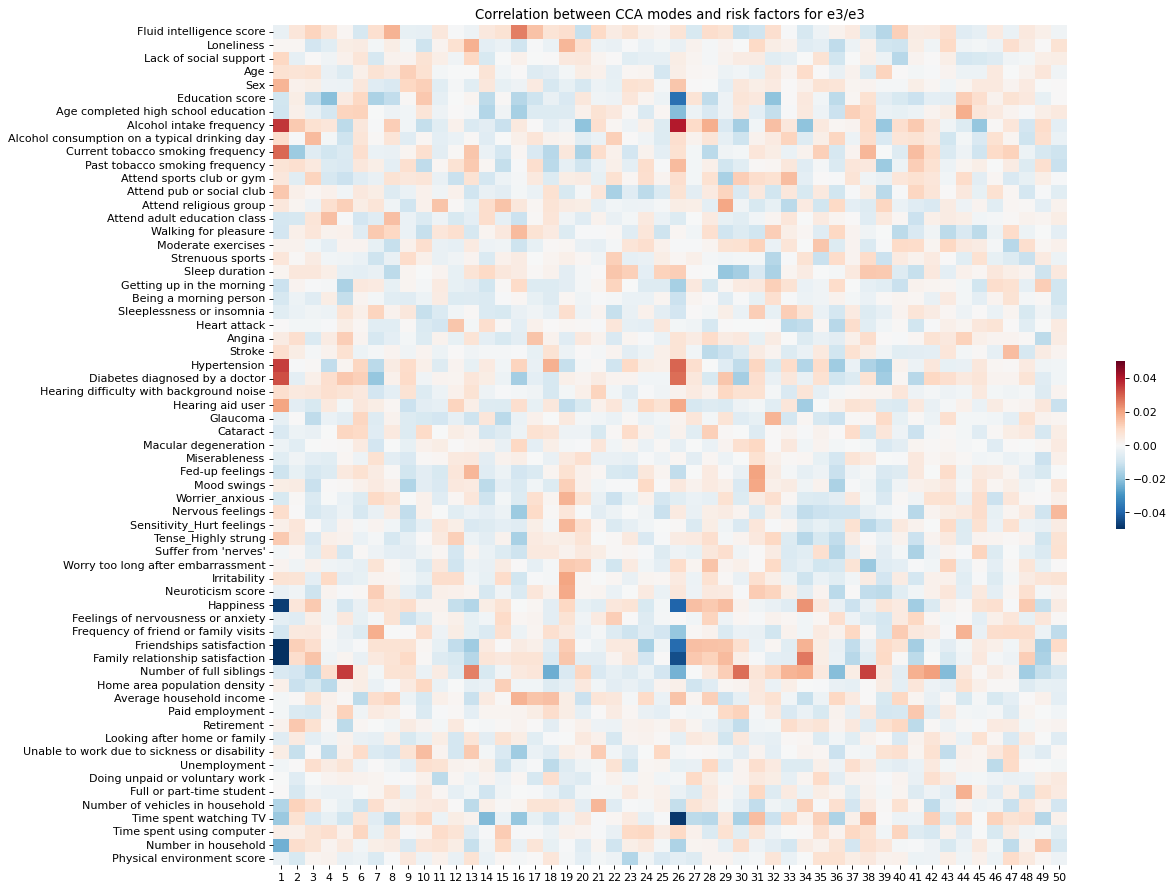

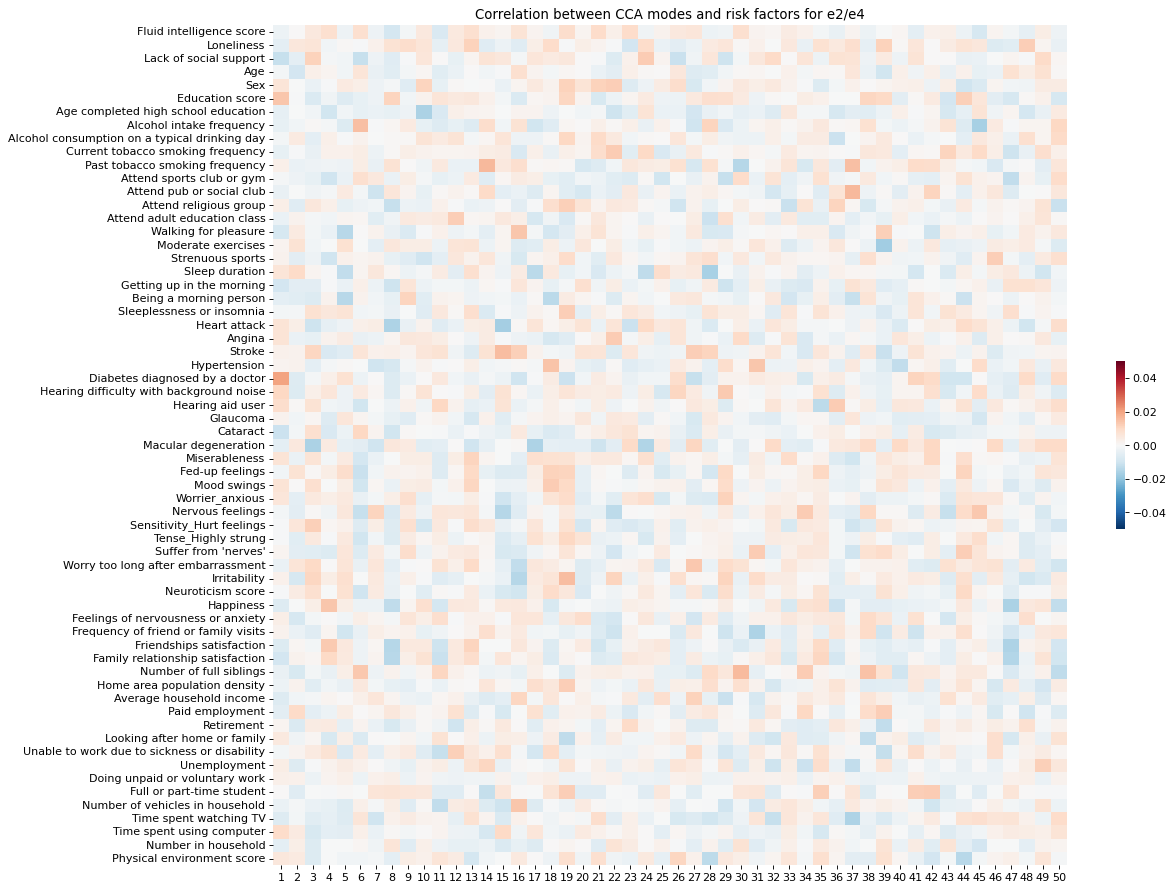

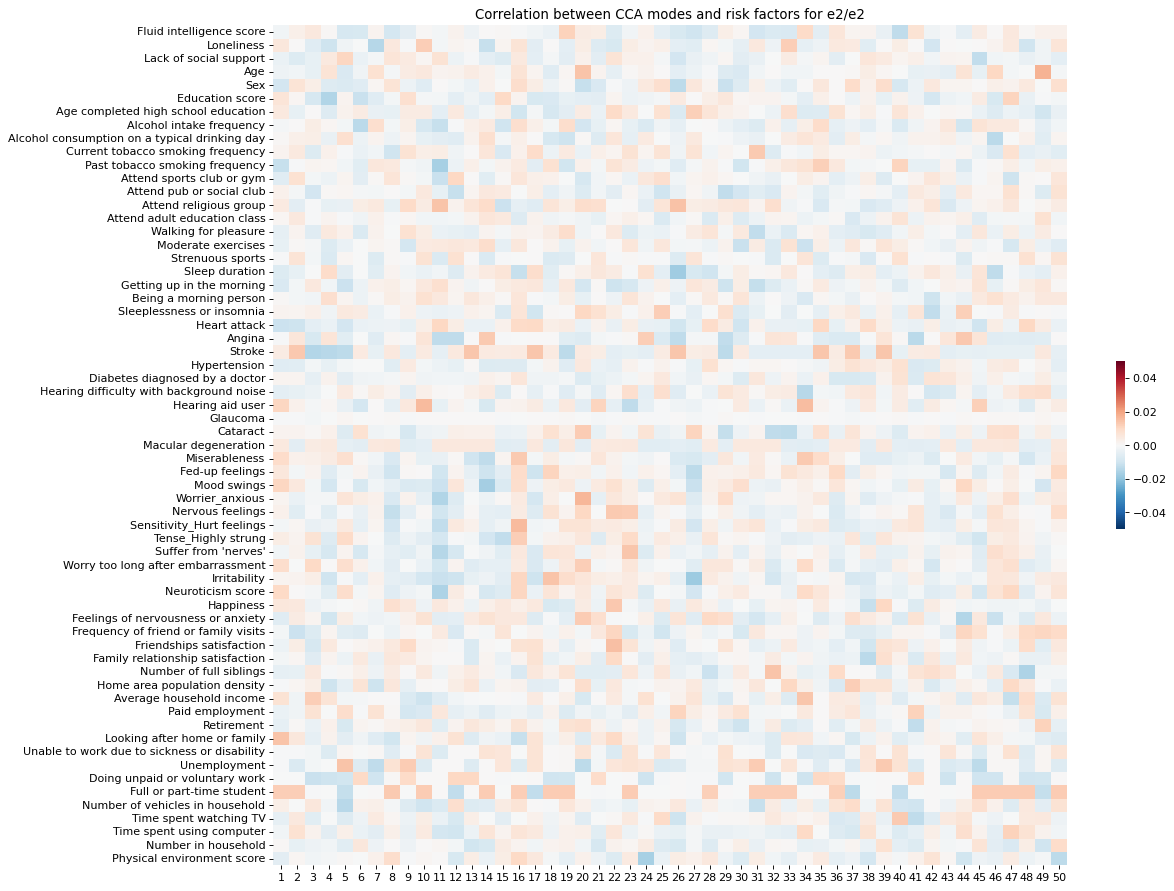

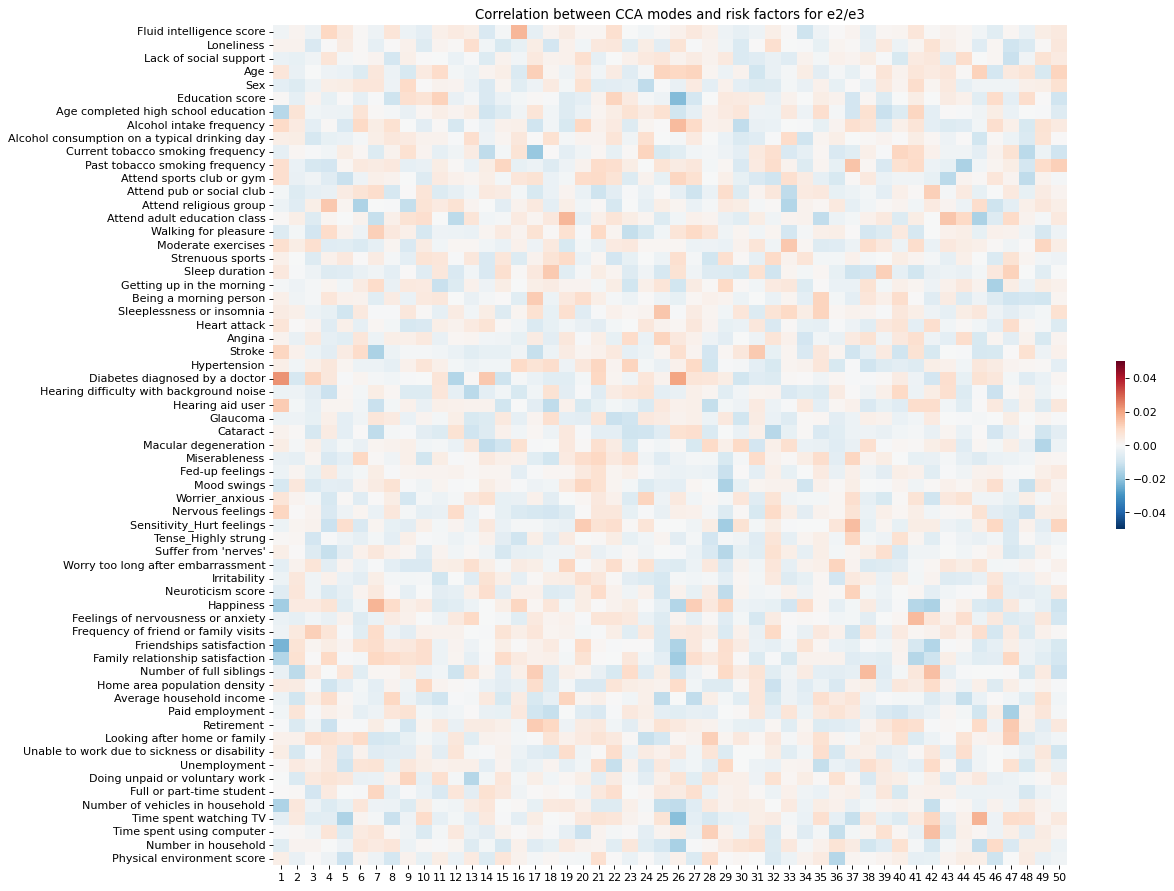

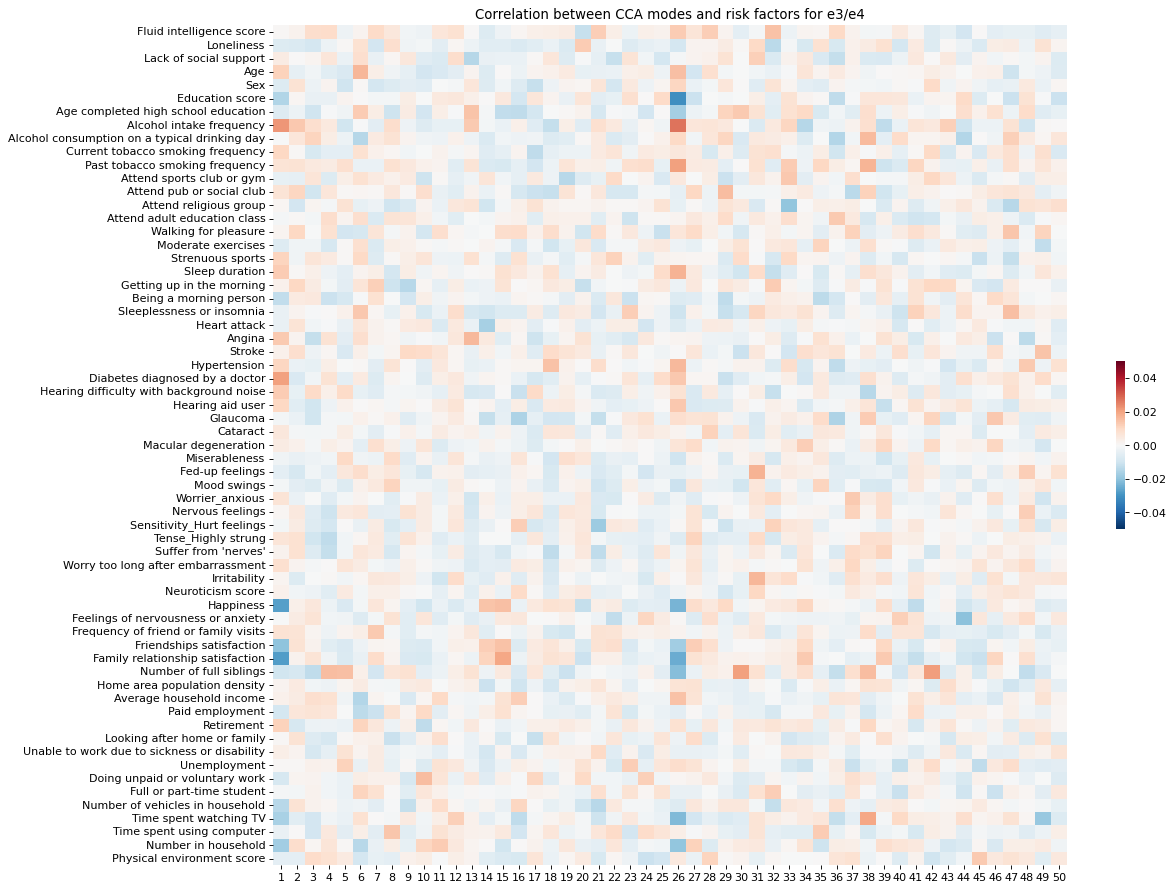

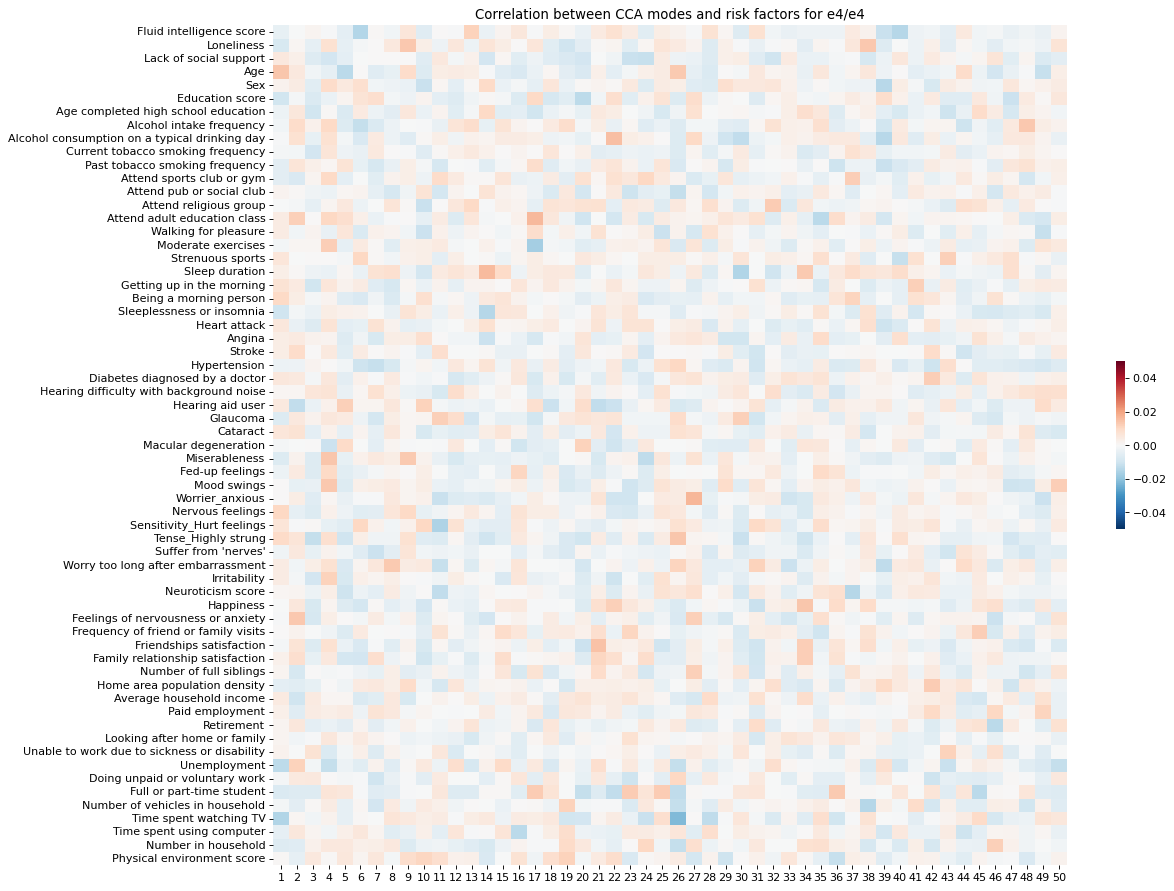

In [18]:
plot_corr(corr_e3e3, 'for e3/e3')
plot_corr(corr_e2e4, 'for e2/e4')
plot_corr(corr_e2e2, 'for e2/e2')
plot_corr(corr_e2e3, 'for e2/e3')
plot_corr(corr_e3e4, 'for e3/e4')
plot_corr(corr_e4e4, 'for e4/e4')

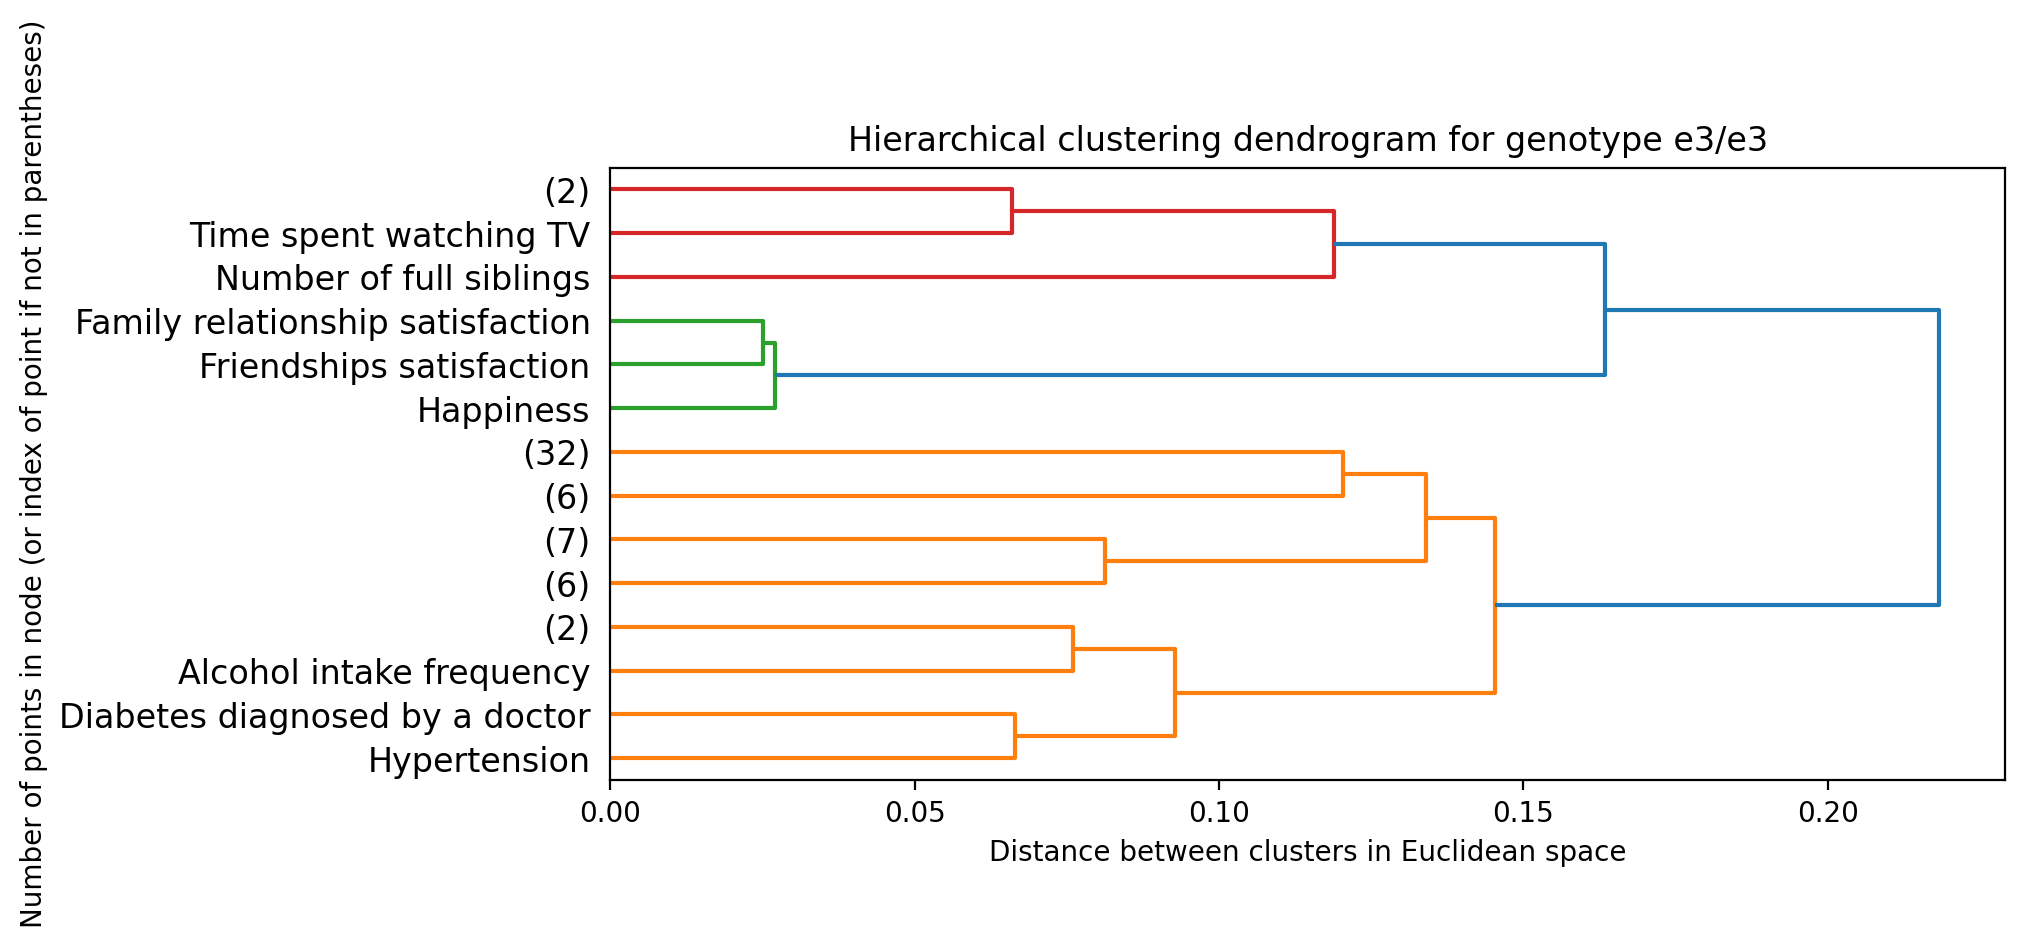

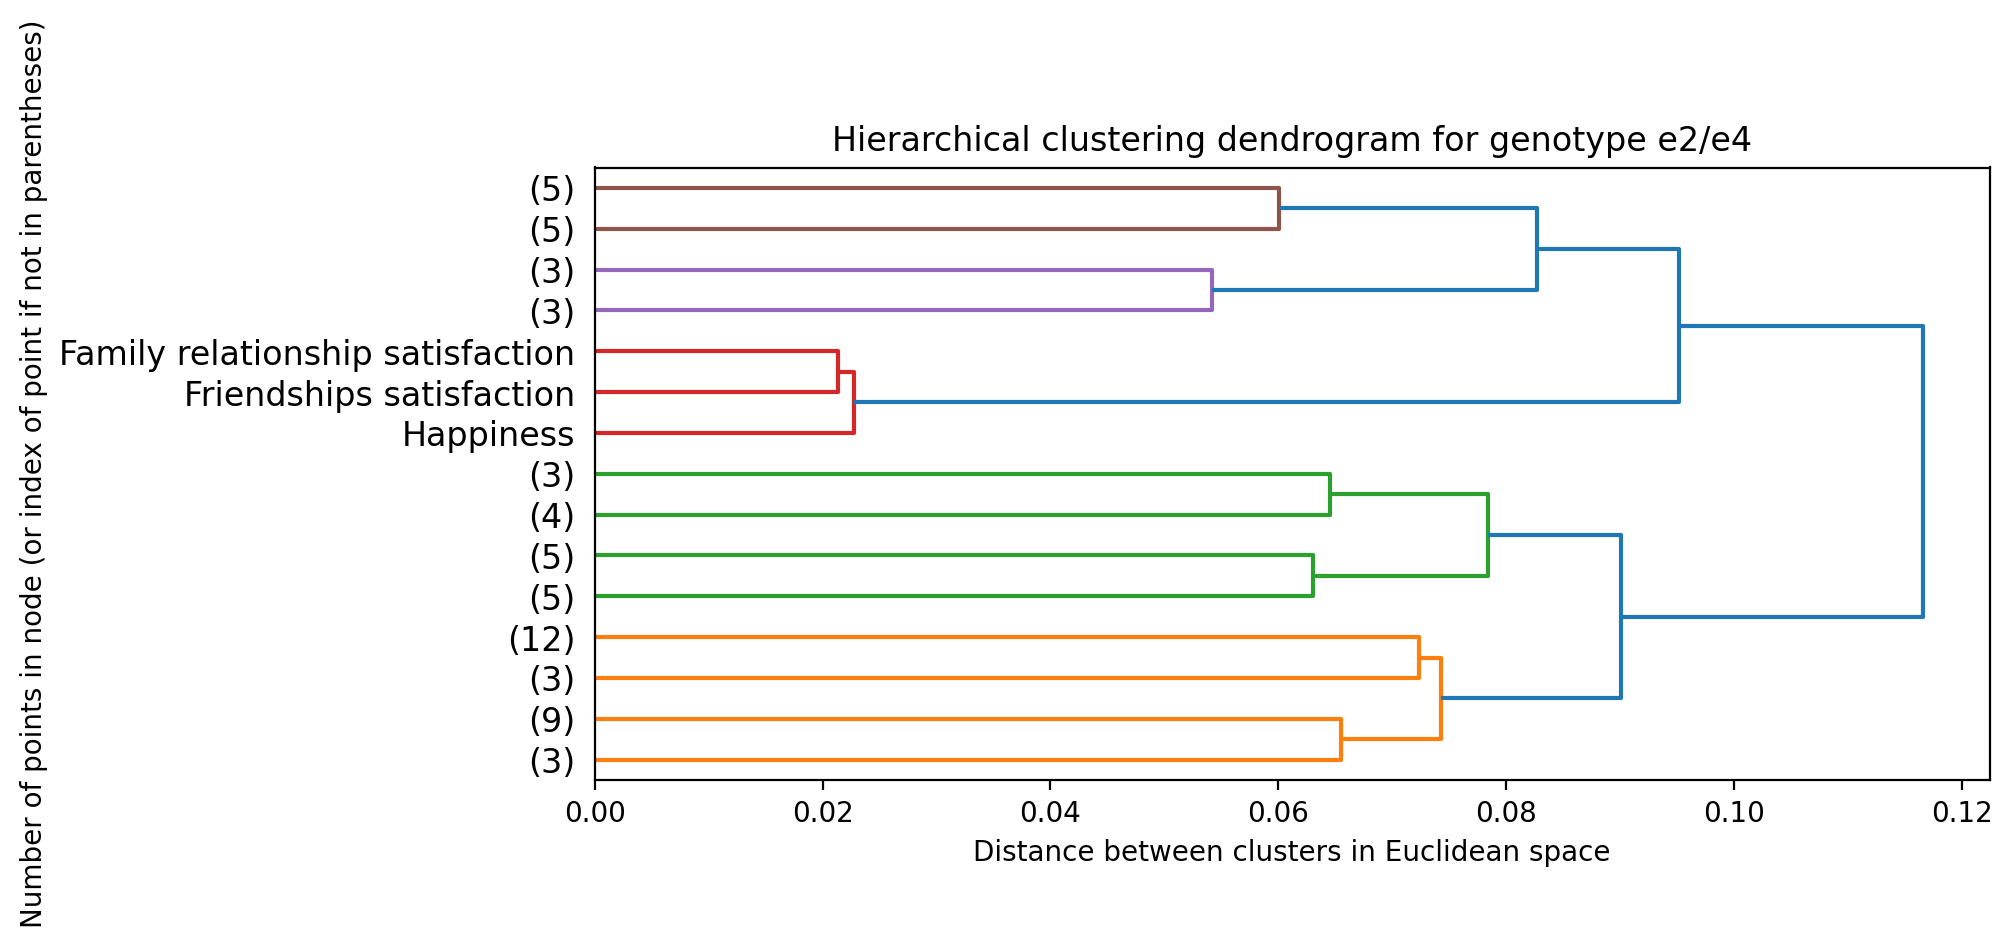

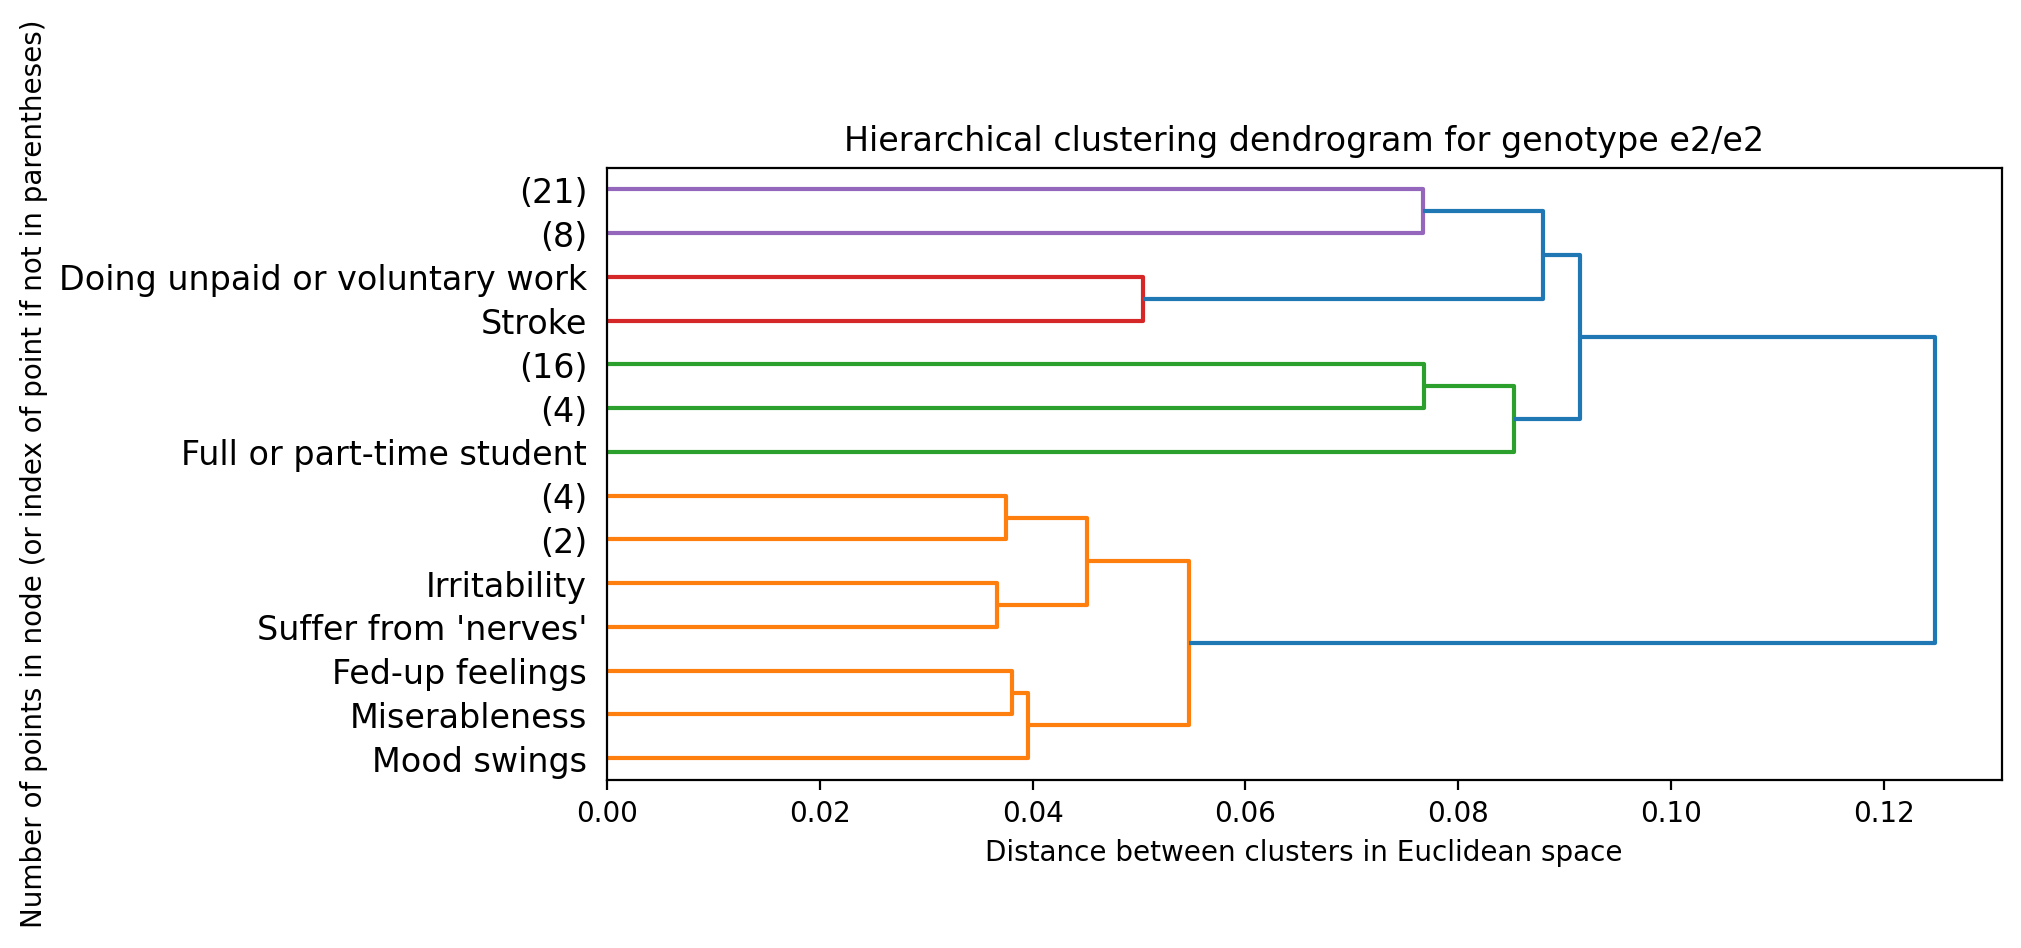

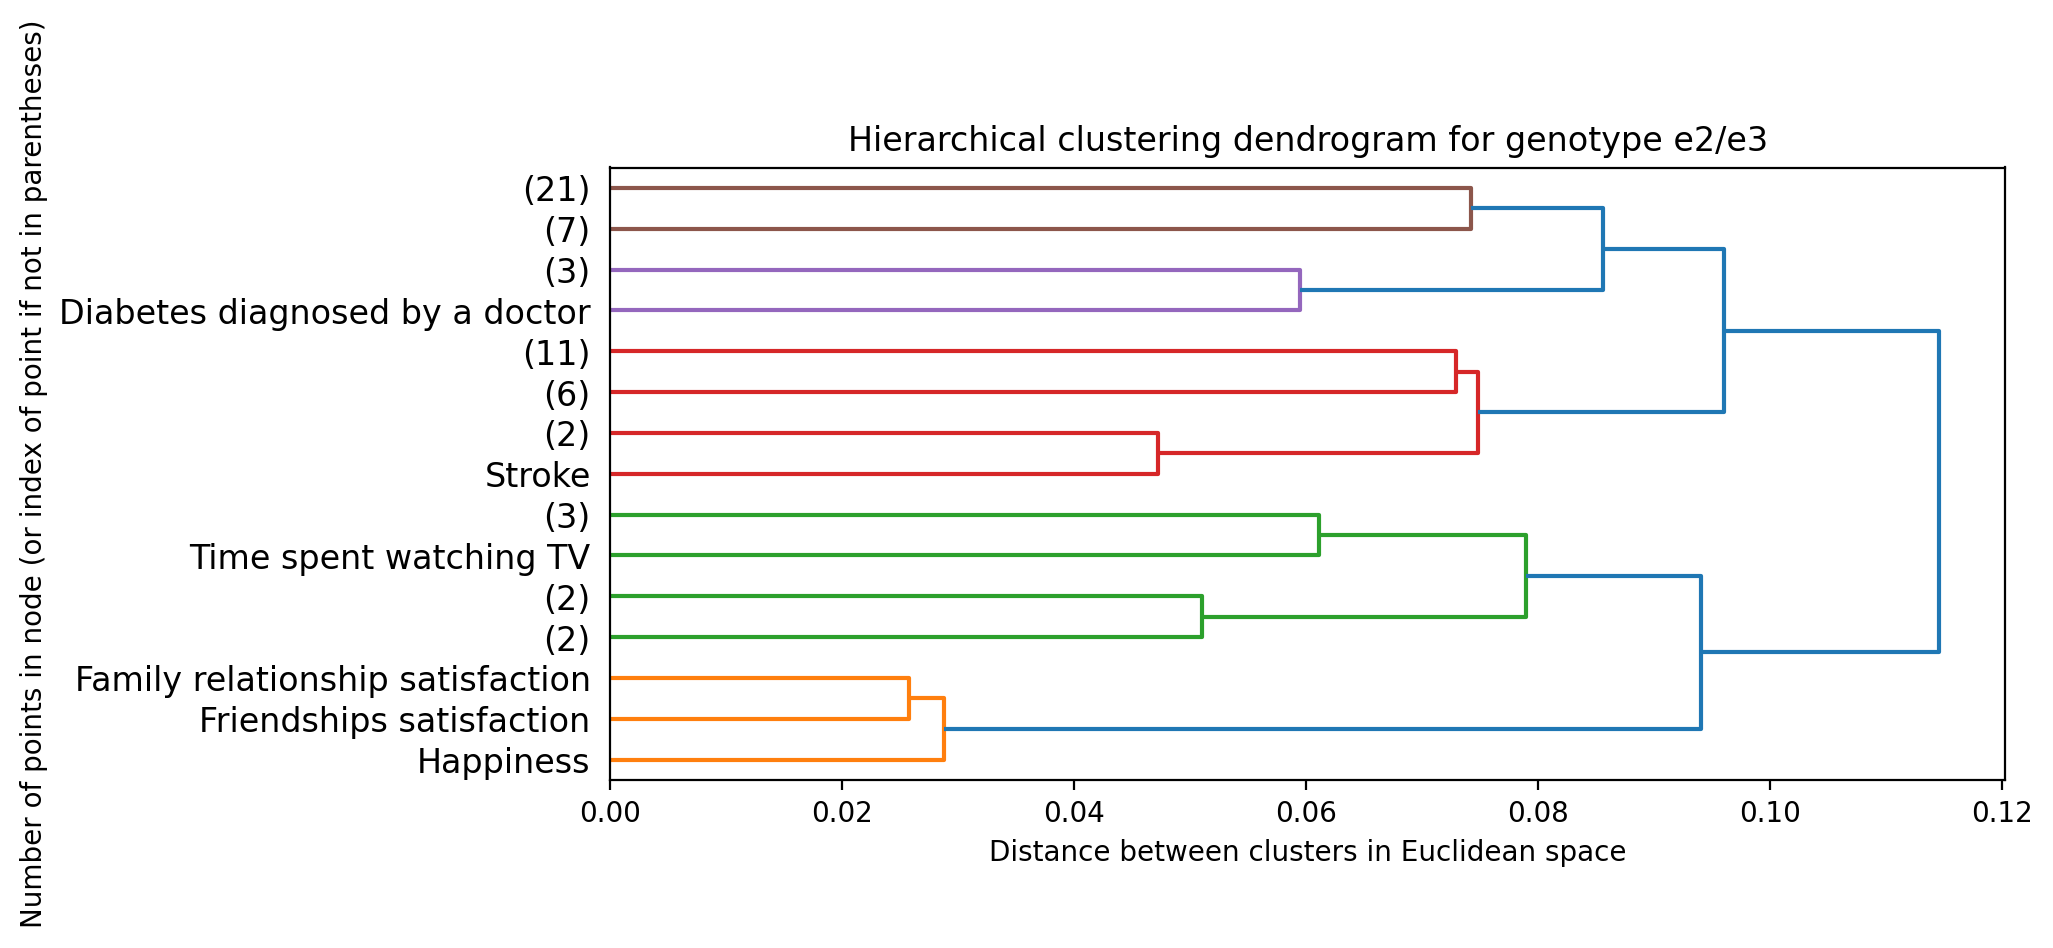

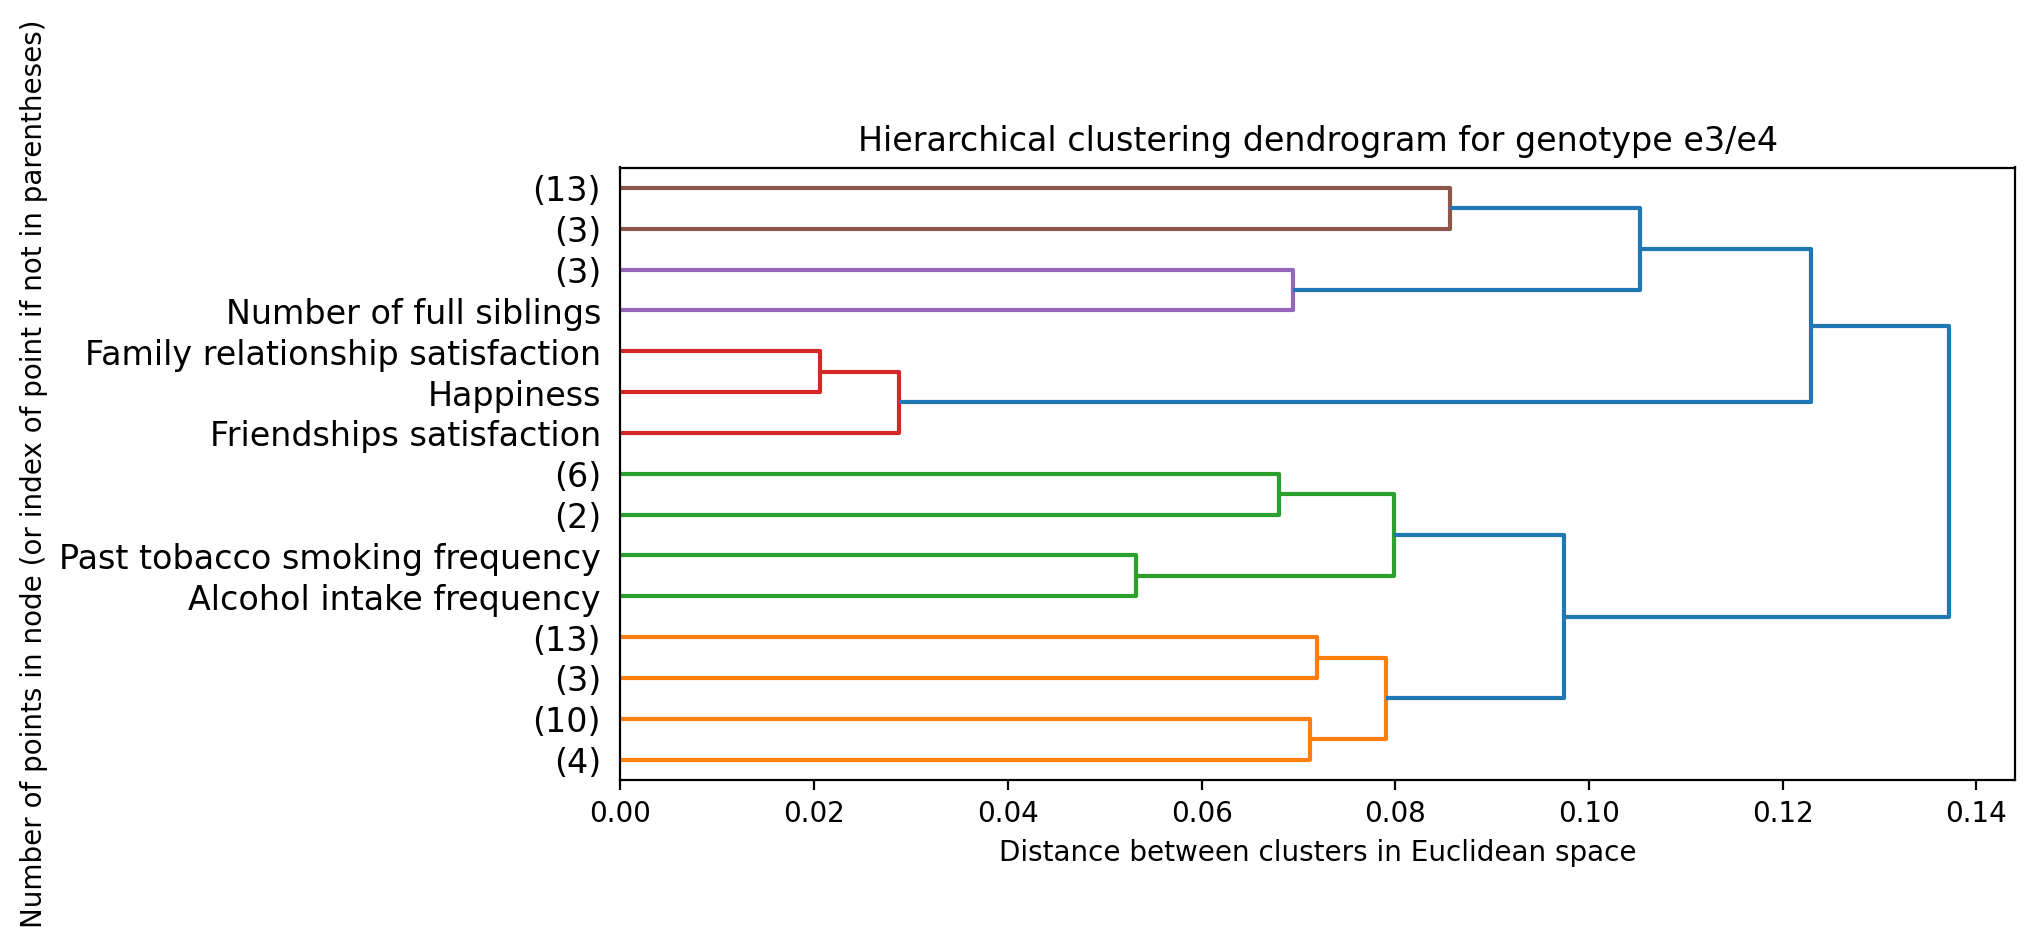

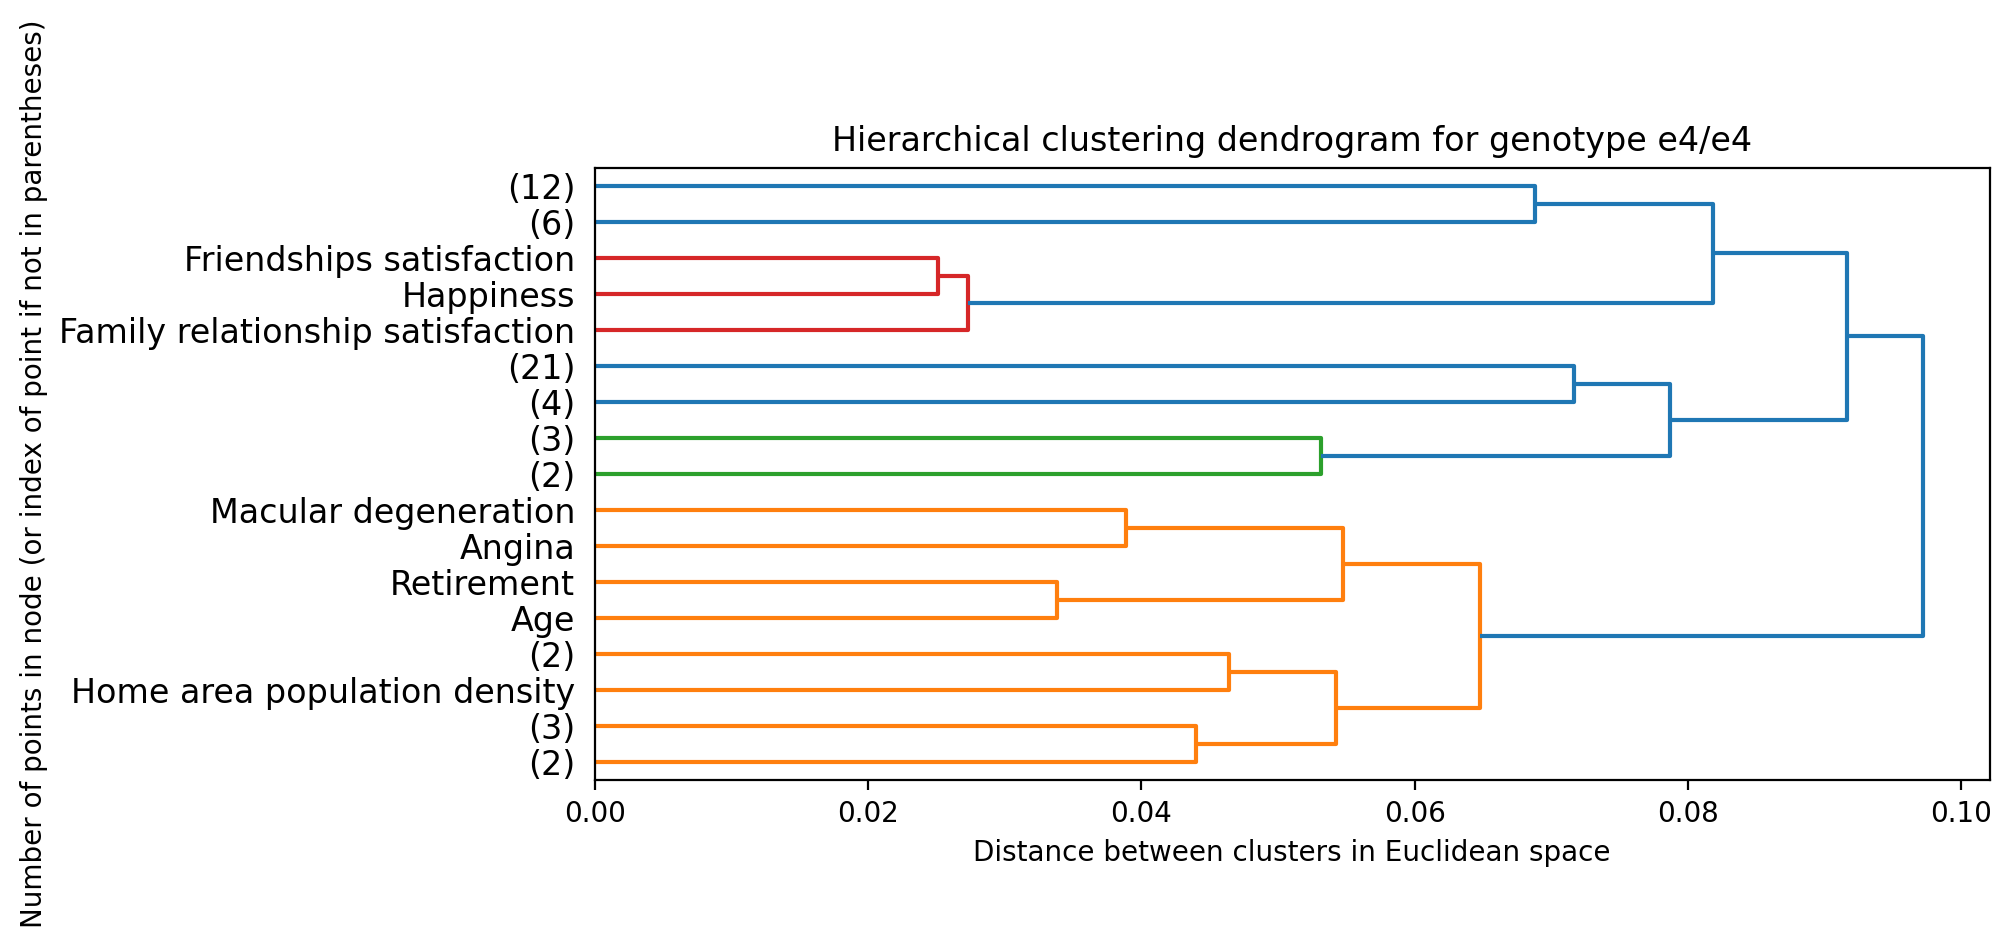

In [36]:
cluster_allmodes(corr_e3e3.T,'e3/e3', 'e3e3')
cluster_allmodes(corr_e2e4.T,'e2/e4', 'e2e4')
cluster_allmodes(corr_e2e2.T,'e2/e2', 'e2e2')
cluster_allmodes(corr_e2e3.T,'e2/e3', 'e2e3')
cluster_allmodes(corr_e3e4.T,'e3/e4', 'e3e4')
cluster_allmodes(corr_e4e4.T,'e4/e4', 'e4e4')

### Cross-correlation plots for input-variable-wise coefficients of genotype-specific clustering

In [ ]:
risks.columns[43:48]

**e2e2**

In [ ]:
e3e3_vs_e2e2 = np.corrcoef(corr_e3e3.T, corr_e2e2.T)

figure(figsize=(16, 12), dpi=80)

sns.heatmap(e3e3_vs_e2e2.T[63:,:63], cmap=plt.cm.RdBu_r, center=0, vmin = -1, vmax =1, cbar_kws={"shrink": 0.2}, yticklabels=risks.columns, xticklabels=risks.columns)
plt.title(f'Cluster-cluster cross-correlation between input variables from the clustering analysis of genotypes e3e3 and e2e2')
plot1_path = os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e2e2.png')
#plt.tight_layout()
plt.subplots_adjust(top=1)
#plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
plt.close()
#save to csv
pd.DataFrame(e3e3_vs_e2e2.T[63:,:63], columns = risks.columns, index = risks.columns).to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e2e2_vs_e3e3.csv'))

In [ ]:
#Happiness
print(e3e3_vs_e2e2.T[63:,:63][43,43])
#Friendships satisfaction
print(e3e3_vs_e2e2.T[63:,:63][46,46])
#Family relationship satisfaction
print(e3e3_vs_e2e2.T[63:,:63][47,47])

**e2e3**

In [ ]:
e3e3_vs_e2e3 = np.corrcoef(corr_e3e3.T, corr_e2e3.T)

figure(figsize=(16, 12), dpi=80)

sns.heatmap(e3e3_vs_e2e3.T[63:,:63], cmap=plt.cm.RdBu_r, center=0, vmin = -1, vmax =1, cbar_kws={"shrink": 0.2}, yticklabels=risks.columns, xticklabels=risks.columns)
plt.title(f'Cluster-cluster cross-correlation between input variables from the clustering analysis of e3e3 and e2e3')
plot1_path = os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e2e3.png')
#plt.tight_layout()
plt.subplots_adjust(top=1)
#plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
plt.close()
#save to csv
pd.DataFrame(e3e3_vs_e2e3.T[63:,:63], columns = risks.columns, index = risks.columns).to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e2e3_vs_e3e3.csv'))

In [ ]:
#Happiness
print(e3e3_vs_e2e3.T[63:,:63][43,43])
#Friendships satisfaction
print(e3e3_vs_e2e3.T[63:,:63][46,46])
#Family relationship satisfaction
print(e3e3_vs_e2e3.T[63:,:63][47,47])

**e3e4**

In [ ]:
e3e3_vs_e3e4 = np.corrcoef(corr_e3e3.T, corr_e3e4.T)

figure(figsize=(16, 12), dpi=80)

sns.heatmap(e3e3_vs_e3e4.T[63:,:63], cmap=plt.cm.RdBu_r, center=0, vmin = -1, vmax =1, cbar_kws={"shrink": 0.2}, yticklabels=risks.columns, xticklabels=risks.columns)
plt.title(f'Cluster-cluster cross-correlation between input variables from the clustering analysis of e3e3 and e3e4')
plot1_path = os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e3e4.png')
#plt.tight_layout()
plt.subplots_adjust(top=1)
#plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
plt.close()
#save to csv
pd.DataFrame(e3e3_vs_e3e4.T[63:,:63], columns = risks.columns, index = risks.columns).to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e3e4_vs_e3e3.csv'))

In [ ]:
#Happiness
print(e3e3_vs_e3e4.T[63:,:63][43,43])
#Friendships satisfaction
print(e3e3_vs_e3e4.T[63:,:63][46,46])
#Family relationship satisfaction
print(e3e3_vs_e3e4.T[63:,:63][47,47])

**e4e4**

In [ ]:
e3e3_vs_e4e4 = np.corrcoef(corr_e3e3.T, corr_e4e4.T)

figure(figsize=(16, 12), dpi=80)

sns.heatmap(e3e3_vs_e4e4.T[63:,:63], cmap=plt.cm.RdBu_r, center=0, vmin = -1, vmax =1, cbar_kws={"shrink": 0.2}, yticklabels=risks.columns, xticklabels=risks.columns)
plt.title(f'Cluster-cluster cross-correlation between input variables from the clustering analysis of e3e3 and e4e4')
plot1_path = os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e4e4.png')
#plt.tight_layout()
plt.subplots_adjust(top=1)
#plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
plt.close()
#save to csv
pd.DataFrame(e3e3_vs_e4e4.T[63:,:63], columns = risks.columns, index = risks.columns).to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e4e4_vs_e3e3.csv'))

In [ ]:
#Happiness
print(e3e3_vs_e4e4.T[63:,:63][43,43])
#Friendships satisfaction
print(e3e3_vs_e4e4.T[63:,:63][46,46])
#Family relationship satisfaction
print(e3e3_vs_e4e4.T[63:,:63][47,47])

**e2e4**

In [ ]:
e3e3_vs_e2e4 = np.corrcoef(corr_e3e3.T, corr_e2e4.T)

figure(figsize=(16, 12), dpi=80)

sns.heatmap(e3e3_vs_e2e4.T[63:,:63], cmap=plt.cm.RdBu_r, center=0, vmin = -1, vmax =1, cbar_kws={"shrink": 0.2}, yticklabels=risks.columns, xticklabels=risks.columns)
plt.title(f'Cluster-cluster cross-correlation between input variables from the clustering analysis of e3e3 and e2e4')
plot1_path = os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e2e4.png')
#plt.tight_layout()
plt.subplots_adjust(top=1)
#plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
plt.close()
#save as csv
pd.DataFrame(e3e3_vs_e2e4.T[63:,:63], columns = risks.columns, index = risks.columns).to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/clustering_analysis/cross_corr_e2e4_vs_e3e3.csv'))